In [9]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import root_mean_squared_error

Matplotlib is building the font cache; this may take a moment.


In [10]:
def read_dataframe(filename, 
                   remove_outliers=True):
    if filename.endswith(".csv"):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith(".parquet"):
        df = pd.read_parquet(filename)

    df["duration"] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    if remove_outliers:
        df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ["PULocationID", "DOLocationID"]
    df[categorical] = df[categorical].astype(str)

    return df

In [13]:
df_jan = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet', remove_outliers=False)

In [14]:
# Q1
print(f"Columns for january 2023 data: {len(df_jan.columns)-1}")

Columns for january 2023 data: 19


In [15]:
# Q2
import statistics
stdev = round(statistics.stdev(df_jan['duration']), 2)
print(f"Standard deviation of duration variable: {stdev}")

Standard deviation of duration variable: 42.59


In [16]:
df_train = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [17]:
# Q3
print(f"{round(len(df_train) / len(df_jan)*100)}%")

98%


In [59]:
dv = DictVectorizer(sparse=True)

train_dicts = df_train[["PULocationID", "DOLocationID"]].to_dict(orient="records")

In [60]:
X_train = dv.fit_transform(train_dicts)

In [61]:
# Q4
print(f"Number of features: {X_train.shape[1]}")

Number of features: 515


In [62]:
# Q5
target = "duration"
y_train = df_train[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

rmse = root_mean_squared_error(y_train, y_pred)
print(f"RMSE: {round(rmse, 2)}")

RMSE: 7.65


In [63]:
df_val = read_dataframe(
    "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"
)

In [66]:
X_val = dv.transform(val_dicts)
y_val = df_val[target].values

In [67]:
# Q6
y_pred = lr.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {round(rmse, 2)}")

RMSE: 7.81


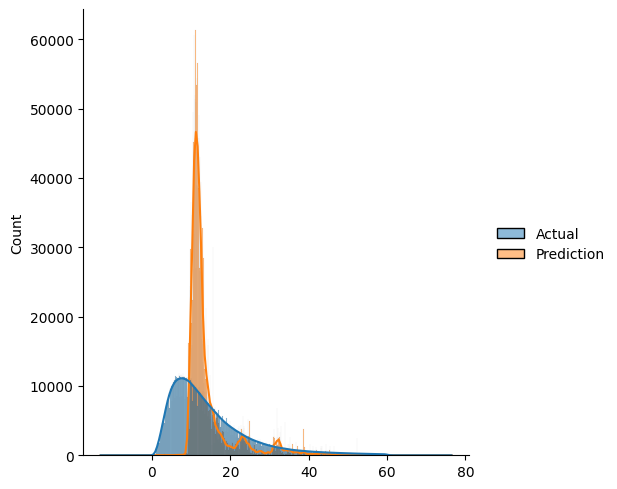

In [68]:
data = pd.DataFrame({"Actual": y_val, "Prediction": y_pred})
sns.displot(data=data, kde=True)
plt.show()